In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
names_by_year = {}
for year in range(1880, 2019):
    names_by_year[year] = pd.read_csv(
        f'names/yob{year}.txt',
        names=['Name','Gender','Count']
    )
# names_all = pd.concat(names_by_year)
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

,Name,Gender,Count
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
...,...,...,...
2018,Zylas,M,5
2018,Zyran,M,5
2018,Zyrie,M,5
2018,Zyron,M,5


График изменения количества имен Ruth и Robert с 1900 по 2000:

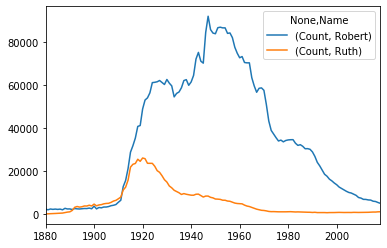

In [100]:
names_new = names_all[names_all['Name'].isin(['Ruth', 'Robert'])]
names_new = names_new.groupby([names_new.index, 'Name']).sum()
names_new.unstack('Name').plot()

Гистограмма по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000):

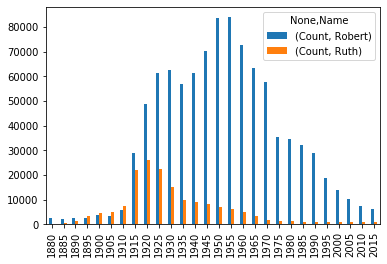

In [106]:
names_new = names_new.loc[(names_new.index.get_level_values(0).isin(range(1880, 2019, 5)))]
names_new.unstack().plot(kind='bar')

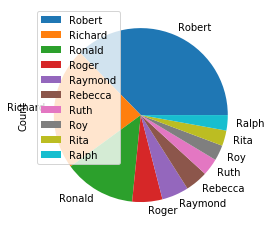

In [179]:
names_1950 = pd.read_csv('names/yob1950.txt', names=['Name','Gender','Count'])
names_1950 = names_1950.sort_values('Count', ascending=False)
names_with_r = {'Name':[],
               'Count':[]
               }

def build_plot(raw):
    if raw[0][0] == 'R':
        names_with_r['Name'].append(raw[0])
        names_with_r['Count'].append(raw[2])

names_1950.index = [i for i in range(0, len(names_1950))]
names_1950.apply(build_plot, axis=1)
plot_df = pd.DataFrame(names_with_r).set_index('Name').head(10)
plot_df.plot(kind='pie', y='Count')


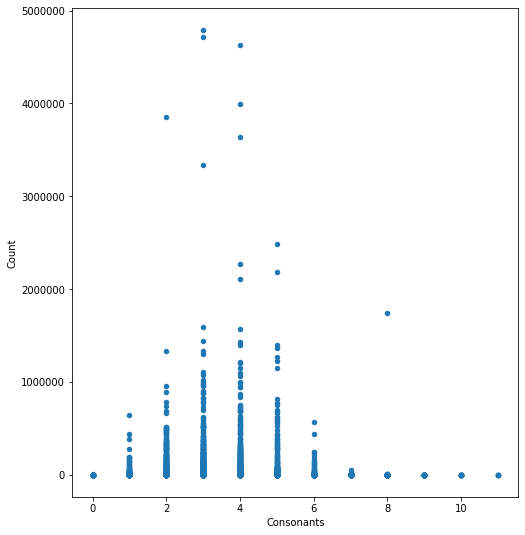

In [50]:
vowels_string = 'aeiouy'

def count_consonants(word):
    count = 0
    for letter in word.lower():
        if letter  not in vowels_string:
            count += 1
    return count

names_by_year = {}
for year in range(1900, 2000):
    names_by_year[year] = pd.read_csv(
        f'names/yob{year}.txt',
        names=['Name','Gender','Count']
    )

names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all = names_all.groupby(['Name']).sum()
names_all['Names'] = names_all.index
names_all.index = [i for i in range(len(names_all))]

names_all['Consonants'] = names_all['Names'].map(count_consonants)
names_all.plot(kind='scatter', x='Consonants', y='Count', figsize=(8,9))